In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv(r"C:\Users\hasan\Downloads\archive/Tesla.csv - Tesla.csv.csv")

In [2]:
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1692
Train data length : 1184
Validation data lenth : 508


In [6]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [7]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [8]:
dataset_train = train_data.Open.values
dataset_train.shape

(1184,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1184, 1)

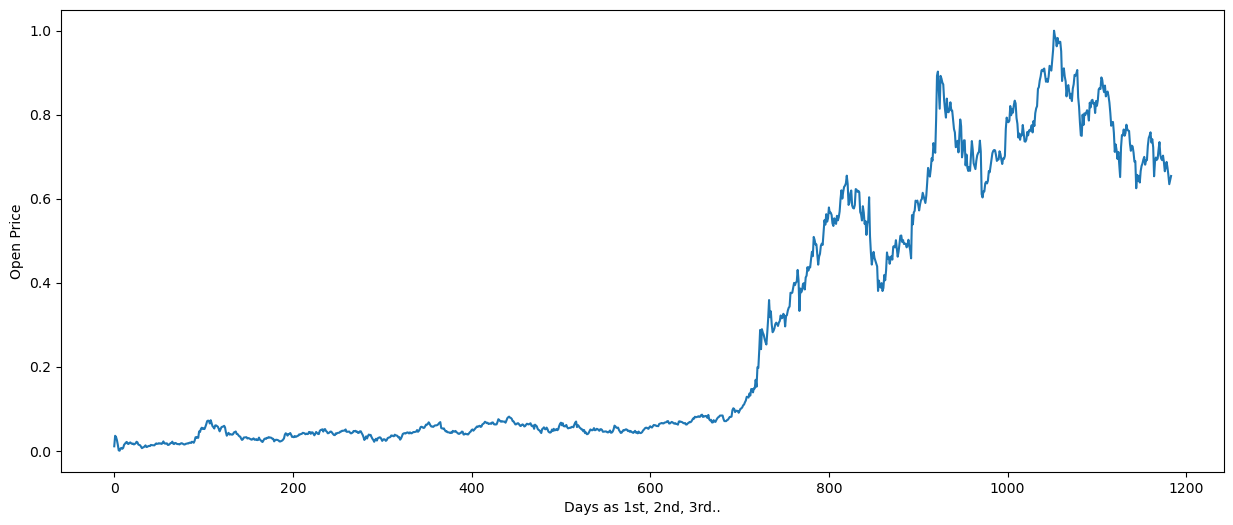

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1134, 50)
Shape of y_train before reshape : (1134,)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


In [15]:
X_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [16]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 9s 66ms/step - loss: 0.3763 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 2s 68ms/step - loss: 0.2113 - accuracy: 8.8183e-04
Epoch 3/50
36/36 [==============================] - 3s 79ms/step - loss: 0.1515 - accuracy: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 3s 79ms/step - loss: 0.0913 - accuracy: 8.8183e-04
Epoch 5/50
36/36 [==============================] - 3s 80ms/step - loss: 0.0649 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 3s 79ms/step - loss: 0.0584 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 3s 80ms/step - loss: 0.0450 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 3s 80ms/step - loss: 0.0331 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 3s 82ms/step - loss: 0.0348 - accuracy: 0.0000e+00
Epoch 10/50
36/36 [==============================] - 3s 81ms/step - loss:

In [38]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

In [19]:
history.history["loss"]

[0.3323103189468384,
 0.18055009841918945,
 0.12208732217550278,
 0.09289045631885529,
 0.0575467050075531,
 0.05143604427576065,
 0.04195874556899071,
 0.03715267777442932,
 0.03057846799492836,
 0.023736855015158653,
 0.023965228348970413,
 0.02142583765089512,
 0.02209940366446972,
 0.018837787210941315,
 0.01683754473924637,
 0.015831511467695236,
 0.016845086589455605,
 0.013913337141275406,
 0.013462310656905174,
 0.012319316156208515,
 0.013091477565467358,
 0.011352053843438625,
 0.010318156331777573,
 0.009351188316941261,
 0.008879612199962139,
 0.00846081878989935,
 0.008945278823375702,
 0.00809385534375906,
 0.007485425099730492,
 0.007133758161216974,
 0.007387671619653702,
 0.006636962294578552,
 0.006133498623967171,
 0.0063117374666035175,
 0.006526909302920103,
 0.005752922967076302,
 0.006007998716086149,
 0.005783493630588055,
 0.0052370247431099415,
 0.004874036647379398,
 0.004798220004886389,
 0.004550647921860218,
 0.005697169341146946,
 0.004619792569428682,
 0

In [17]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor2 = Sequential()

# adding first RNN layer and dropout regulatization
regressor2.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor2.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor2.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor2.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor2.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor2.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor2.add(
    SimpleRNN(units = 50)
             )

regressor2.add(
    Dropout(0.2)
             )

# adding the output layer
regressor2.add(Dense(units = 1))

# compiling RNN
regressor2.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history2 = regressor2.fit(X_train, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
18/18 [==============================] - 8s 78ms/step - loss: 0.3659 - accuracy: 8.8183e-04
Epoch 2/50
18/18 [==============================] - 1s 77ms/step - loss: 0.2487 - accuracy: 8.8183e-04
Epoch 3/50
18/18 [==============================] - 1s 79ms/step - loss: 0.1945 - accuracy: 8.8183e-04
Epoch 4/50
18/18 [==============================] - 1s 76ms/step - loss: 0.1416 - accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 1s 76ms/step - loss: 0.1041 - accuracy: 8.8183e-04
Epoch 6/50
18/18 [==============================] - 1s 77ms/step - loss: 0.0837 - accuracy: 8.8183e-04
Epoch 7/50
18/18 [==============================] - 1s 78ms/step - loss: 0.0680 - accuracy: 8.8183e-04
Epoch 8/50
18/18 [==============================] - 1s 77ms/step - loss: 0.0674 - accuracy: 0.0000e+00
Epoch 9/50
18/18 [==============================] - 1s 78ms/step - loss: 0.0548 - accuracy: 8.8183e-04
Epoch 10/50
18/18 [==============================] - 1s 78ms/step - loss:

In [20]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor3= Sequential()

# adding first RNN layer and dropout regulatization
regressor3.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor3.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor3.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor3.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor3.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor3.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor3.add(
    SimpleRNN(units = 50)
             )

regressor3.add(
    Dropout(0.2)
             )

# adding the output layer
regressor3.add(Dense(units = 1))

# compiling RNN
regressor3.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history3 = regressor3.fit(X_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
71/71 [==============================] - 12s 70ms/step - loss: 0.3554 - accuracy: 8.8183e-04
Epoch 2/50
71/71 [==============================] - 5s 71ms/step - loss: 0.1682 - accuracy: 8.8183e-04
Epoch 3/50
71/71 [==============================] - 5s 71ms/step - loss: 0.1082 - accuracy: 8.8183e-04
Epoch 4/50
71/71 [==============================] - 5s 72ms/step - loss: 0.0741 - accuracy: 8.8183e-04
Epoch 5/50
71/71 [==============================] - 5s 70ms/step - loss: 0.0531 - accuracy: 8.8183e-04
Epoch 6/50
71/71 [==============================] - 5s 73ms/step - loss: 0.0378 - accuracy: 8.8183e-04
Epoch 7/50
71/71 [==============================] - 5s 72ms/step - loss: 0.0348 - accuracy: 8.8183e-04
Epoch 8/50
71/71 [==============================] - 5s 74ms/step - loss: 0.0339 - accuracy: 8.8183e-04
Epoch 9/50
71/71 [==============================] - 5s 75ms/step - loss: 0.0252 - accuracy: 8.8183e-04
Epoch 10/50
71/71 [==============================] - 5s 73ms/step - loss

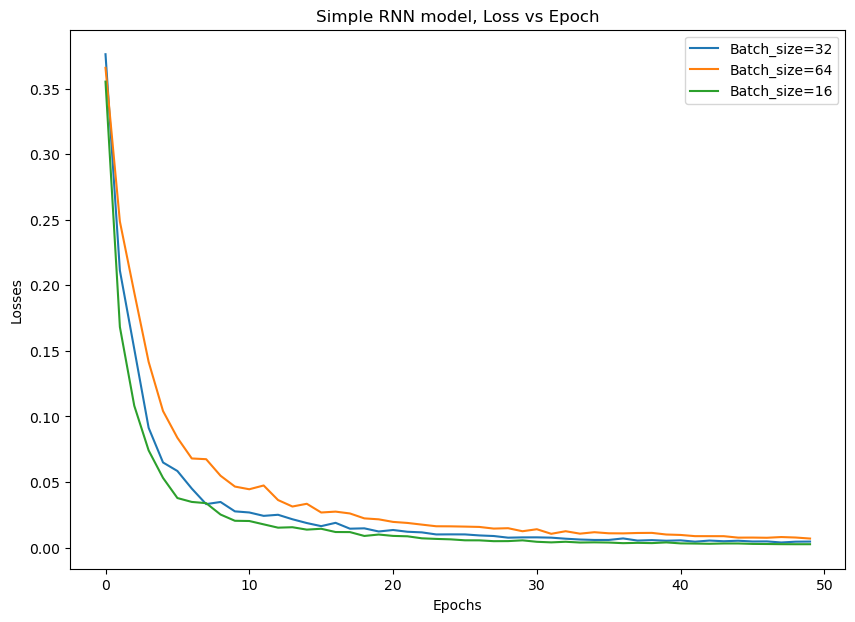

In [43]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"],label = "Batch_size=32")
plt.plot(history2.history["loss"],label = "Batch_size=64")
plt.plot(history3.history["loss"],label = "Batch_size=16")

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.legend()
plt.show()

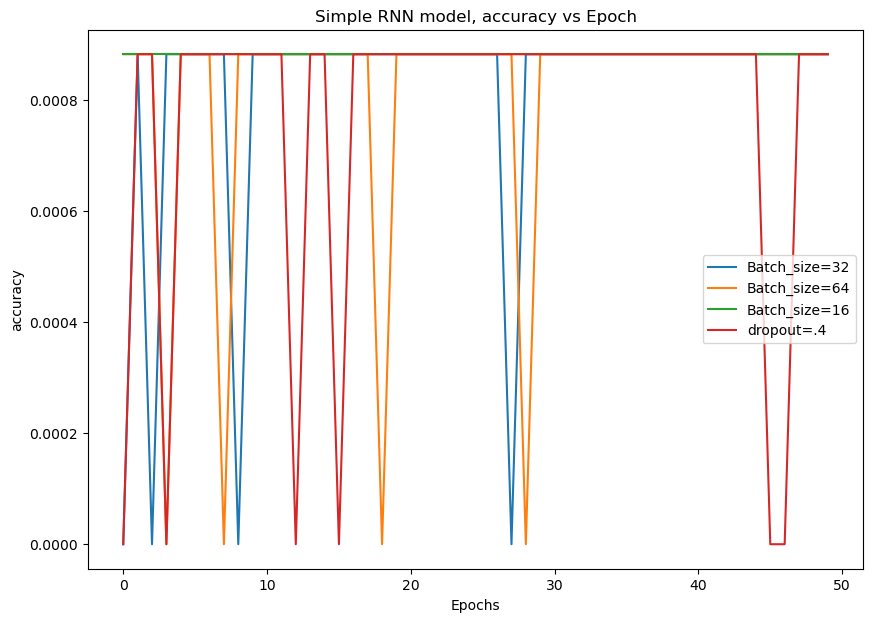

In [37]:
plt.figure(figsize =(10,7))
plt.plot(history.history["accuracy"],label = "Batch_size=32")
plt.plot(history2.history["accuracy"],label = "Batch_size=64")
plt.plot(history3.history["accuracy"],label = "Batch_size=16")
plt.plot(history4.history["accuracy"],label = "dropout=.4")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Simple RNN model, accuracy vs Epoch")
plt.legend()
plt.show()

In [31]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor4= Sequential()

# adding first RNN layer and dropout regulatization
regressor4.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor4.add(
    Dropout(0.4)
             )


# adding second RNN layer and dropout regulatization

regressor4.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor4.add(
    Dropout(0.4)
             )

# adding third RNN layer and dropout regulatization

regressor4.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor4.add(
    Dropout(0.4)
             )

# adding fourth RNN layer and dropout regulatization

regressor4.add(
    SimpleRNN(units = 50)
             )

regressor4.add(
    Dropout(0.4)
             )

# adding the output layer
regressor4.add(Dense(units = 1))

# compiling RNN
regressor4.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history4 = regressor4.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 9s 76ms/step - loss: 0.7236 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 3s 77ms/step - loss: 0.4256 - accuracy: 8.8183e-04
Epoch 3/50
36/36 [==============================] - 3s 76ms/step - loss: 0.3440 - accuracy: 8.8183e-04
Epoch 4/50
36/36 [==============================] - 3s 76ms/step - loss: 0.2438 - accuracy: 0.0000e+00
Epoch 5/50
36/36 [==============================] - 3s 74ms/step - loss: 0.1982 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 3s 70ms/step - loss: 0.1637 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 2s 68ms/step - loss: 0.1200 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 3s 72ms/step - loss: 0.0968 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 3s 79ms/step - loss: 0.0741 - accuracy: 8.8183e-04
Epoch 10/50
36/36 [==============================] - 3s 79ms/step - loss:

In [39]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor5= Sequential()

# adding first RNN layer and dropout regulatization
regressor5.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor5.add(
    Dropout(0.6)
             )


# adding second RNN layer and dropout regulatization

regressor5.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor5.add(
    Dropout(0.6)
             )

# adding third RNN layer and dropout regulatization

regressor5.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor5.add(
    Dropout(0.6)
             )

# adding fourth RNN layer and dropout regulatization

regressor5.add(
    SimpleRNN(units = 50)
             )

regressor5.add(
    Dropout(0.6)
             )

# adding the output layer
regressor5.add(Dense(units = 1))

# compiling RNN
regressor5.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history5 = regressor5.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 9s 72ms/step - loss: 1.7459 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 3s 70ms/step - loss: 1.2441 - accuracy: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 3s 71ms/step - loss: 1.0035 - accuracy: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 3s 73ms/step - loss: 0.8097 - accuracy: 0.0000e+00
Epoch 5/50
36/36 [==============================] - 3s 71ms/step - loss: 0.6356 - accuracy: 0.0000e+00
Epoch 6/50
36/36 [==============================] - 3s 70ms/step - loss: 0.4954 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 3s 72ms/step - loss: 0.3731 - accuracy: 0.0000e+00
Epoch 8/50
36/36 [==============================] - 3s 73ms/step - loss: 0.3150 - accuracy: 0.0000e+00
Epoch 9/50
36/36 [==============================] - 3s 73ms/step - loss: 0.2570 - accuracy: 0.0000e+00
Epoch 10/50
36/36 [==============================] - 3s 73ms/step - loss:

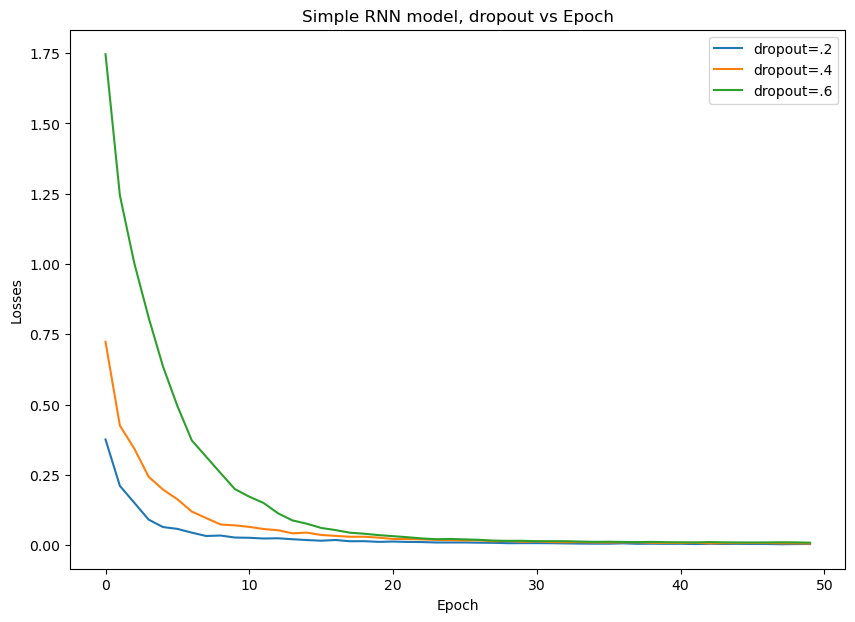

In [41]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"],label = "dropout=.2")
plt.plot(history4.history["loss"],label = "dropout=.4")
plt.plot(history5.history["loss"],label = "dropout=.6")

plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Simple RNN model, dropout vs Epoch")
plt.legend()
plt.show()

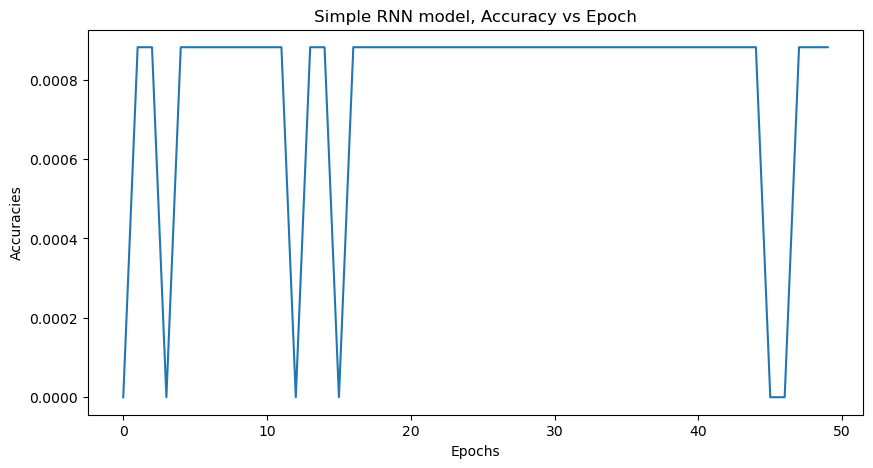

In [35]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history4.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [22]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

36/36 [==============================] - 2s 22ms/step


(1134, 1)

In [52]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1134, 1)

In [51]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


NameError: name 'y_pred' is not defined

<Figure size 3000x1000 with 0 Axes>

In [53]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (508, 1)


In [54]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [55]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [56]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [29]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

15/15 [==============================] - 0s 21ms/step
Shape of y_pred_of_test : (458, 1)


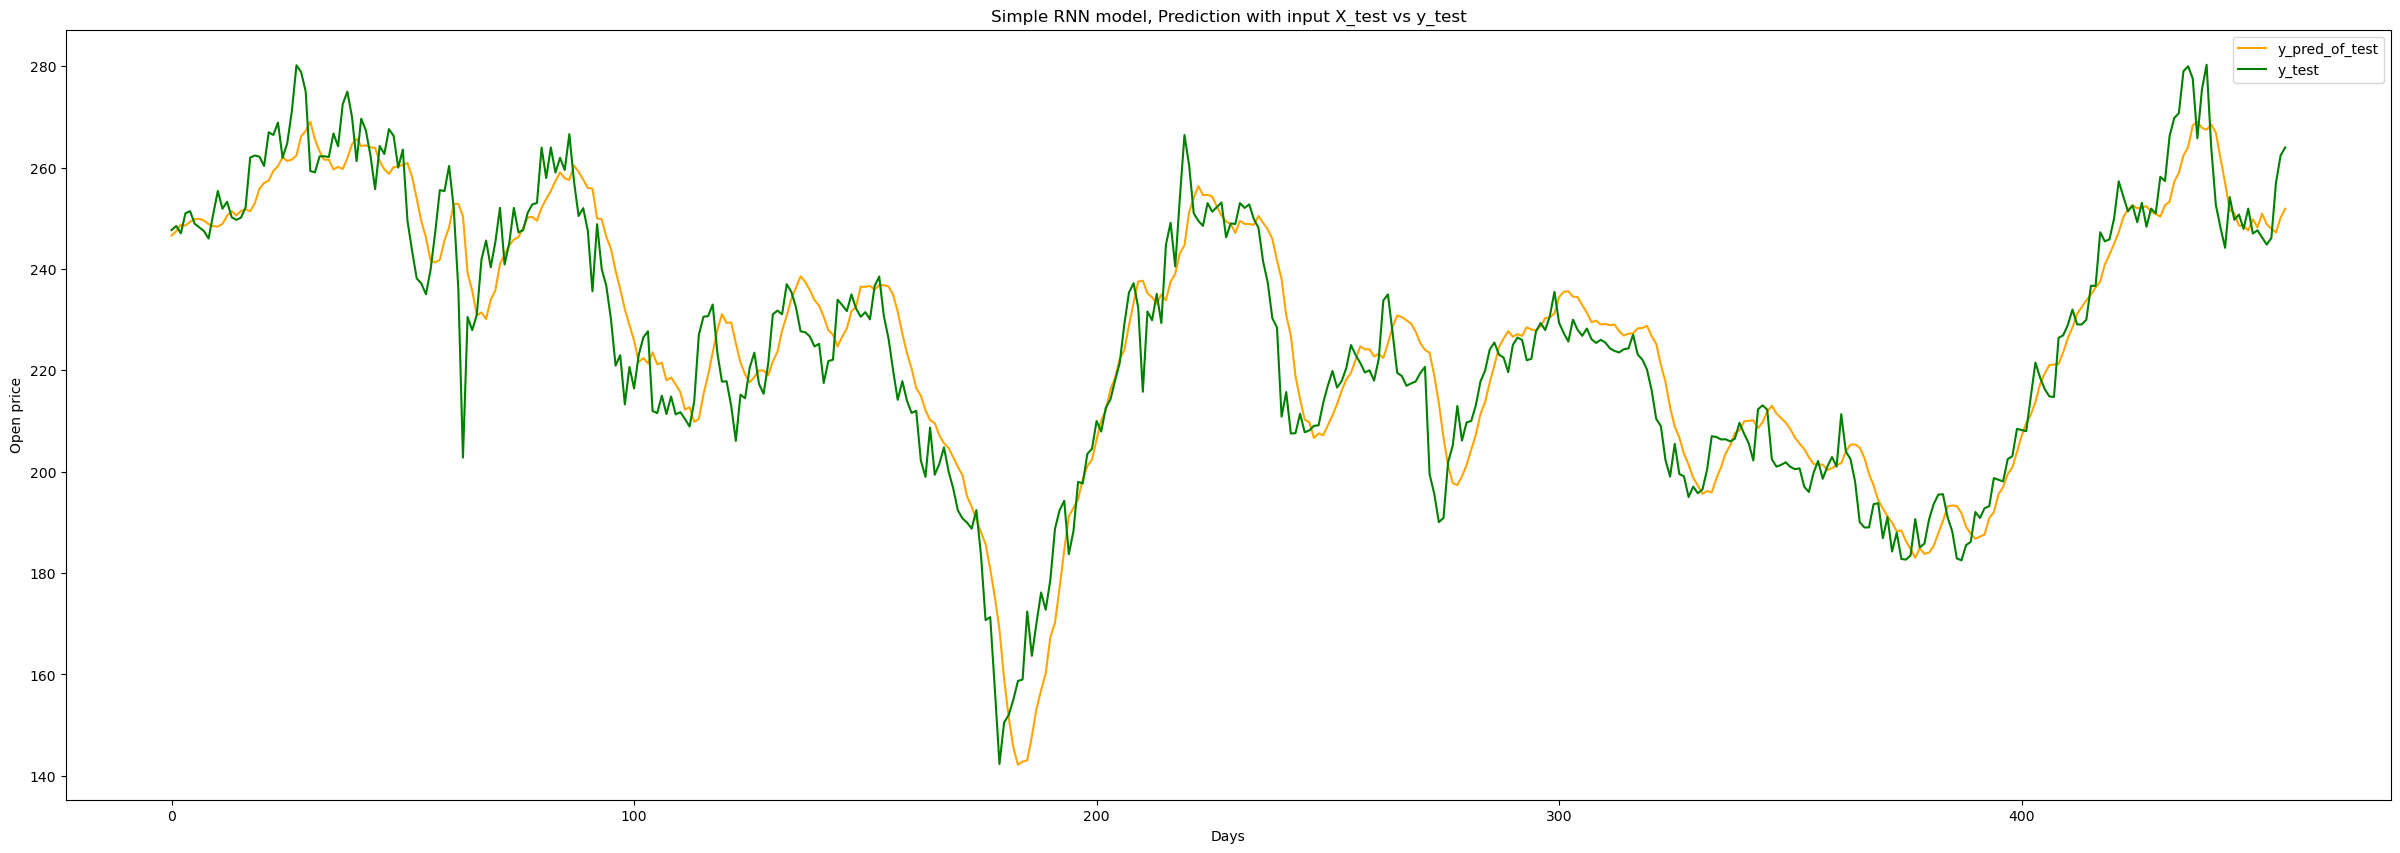

In [30]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

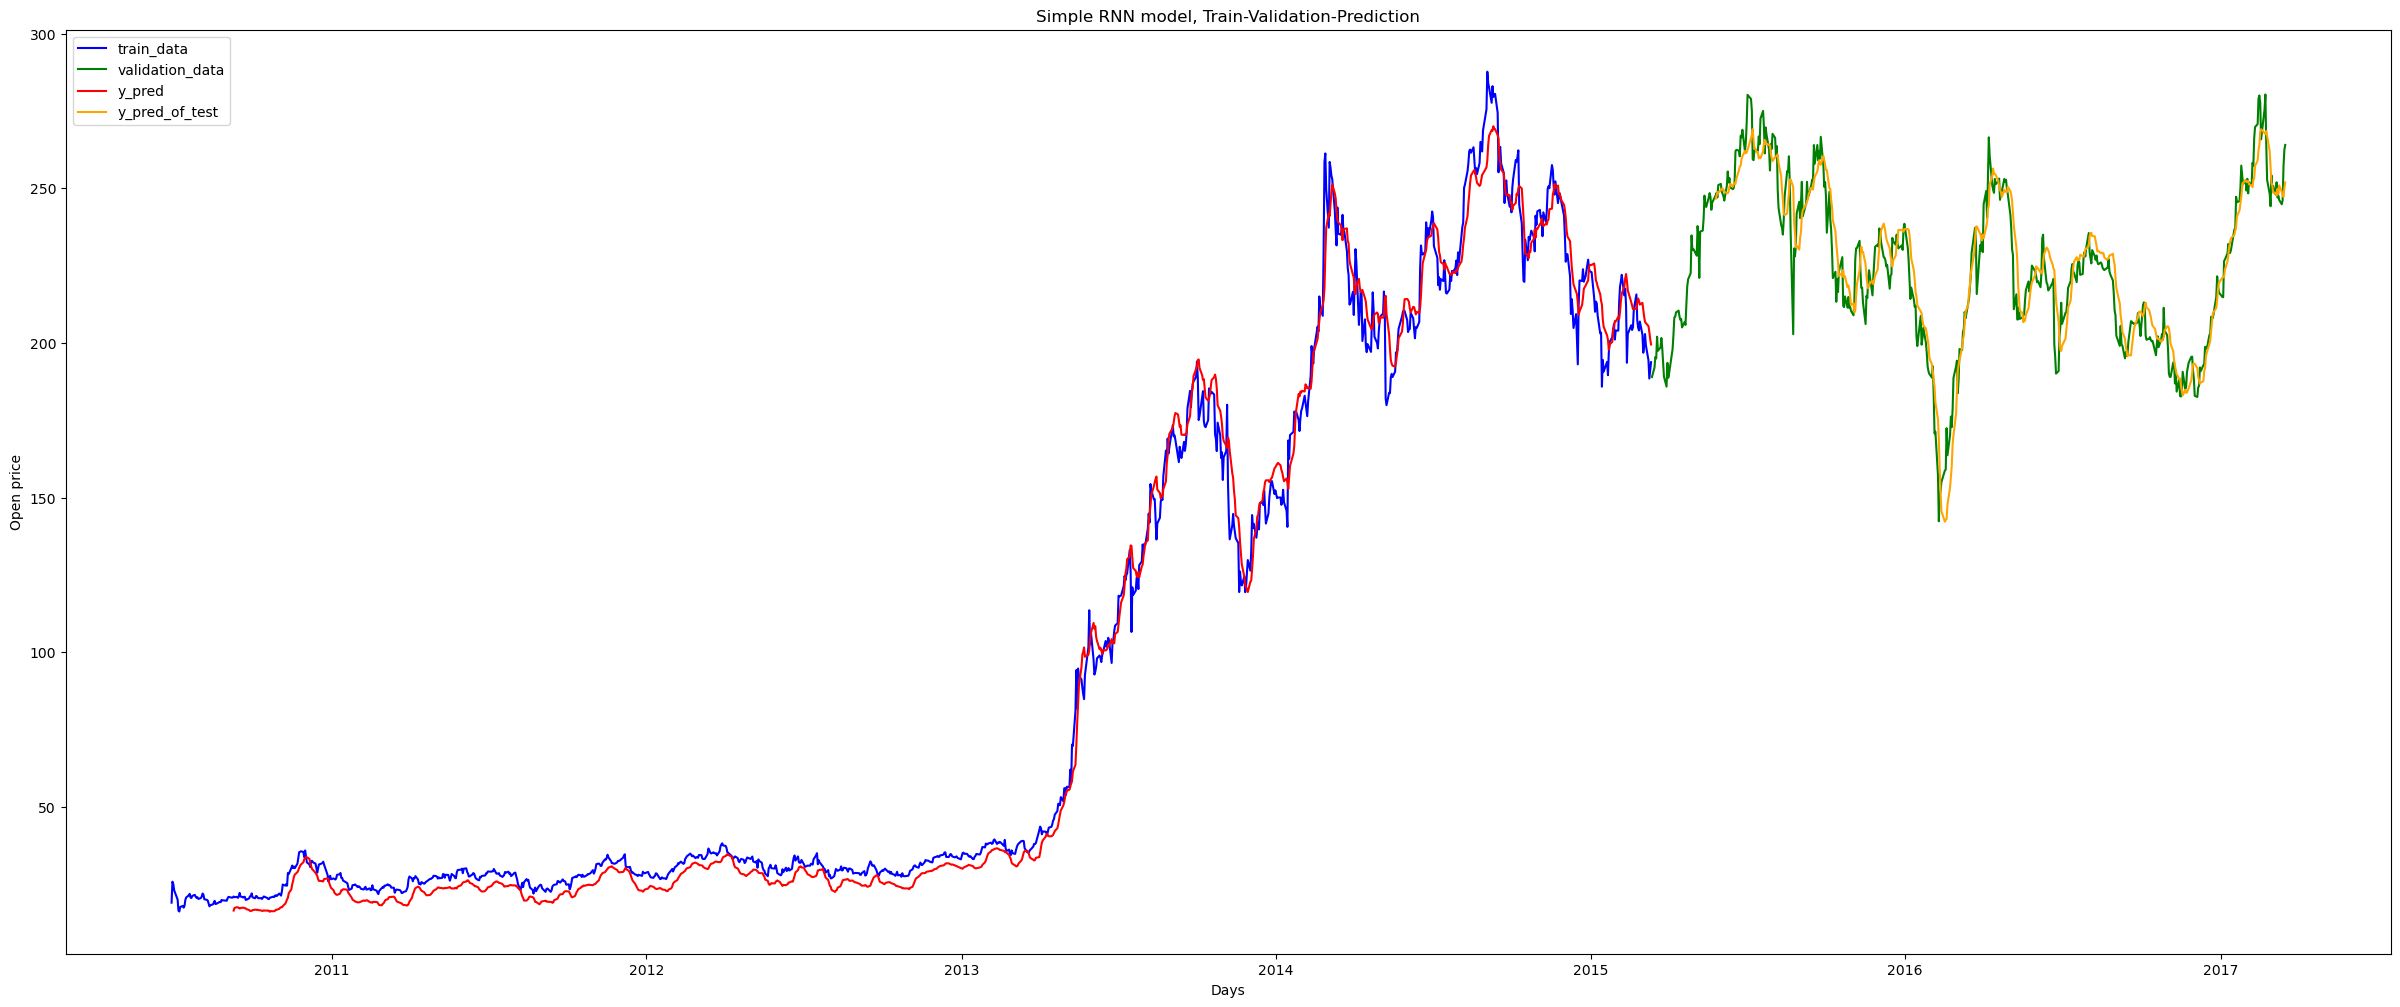

In [31]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [32]:
y_train = scaler.fit_transform(y_train)

In [44]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history_lstm = model_lstm.fit(X_train, y_train, epochs = 20, batch_size = 10)


Epoch 1/20
114/114 [==============================] - 15s 67ms/step - loss: 0.0095 - accuracy: 8.8183e-04
Epoch 2/20
114/114 [==============================] - 7s 65ms/step - loss: 0.0012 - accuracy: 8.8183e-04
Epoch 3/20
114/114 [==============================] - 8s 66ms/step - loss: 0.0013 - accuracy: 8.8183e-04
Epoch 4/20
114/114 [==============================] - 8s 67ms/step - loss: 0.0011 - accuracy: 8.8183e-04
Epoch 5/20
114/114 [==============================] - 8s 68ms/step - loss: 9.0853e-04 - accuracy: 8.8183e-04
Epoch 6/20
114/114 [==============================] - 8s 67ms/step - loss: 8.2492e-04 - accuracy: 8.8183e-04
Epoch 7/20
114/114 [==============================] - 8s 68ms/step - loss: 7.4034e-04 - accuracy: 8.8183e-04
Epoch 8/20
114/114 [==============================] - 8s 68ms/step - loss: 6.5393e-04 - accuracy: 8.8183e-04
Epoch 9/20
114/114 [==============================] - 8s 67ms/step - loss: 6.3557e-04 - accuracy: 8.8183e-04
Epoch 10/20
114/114 [=============

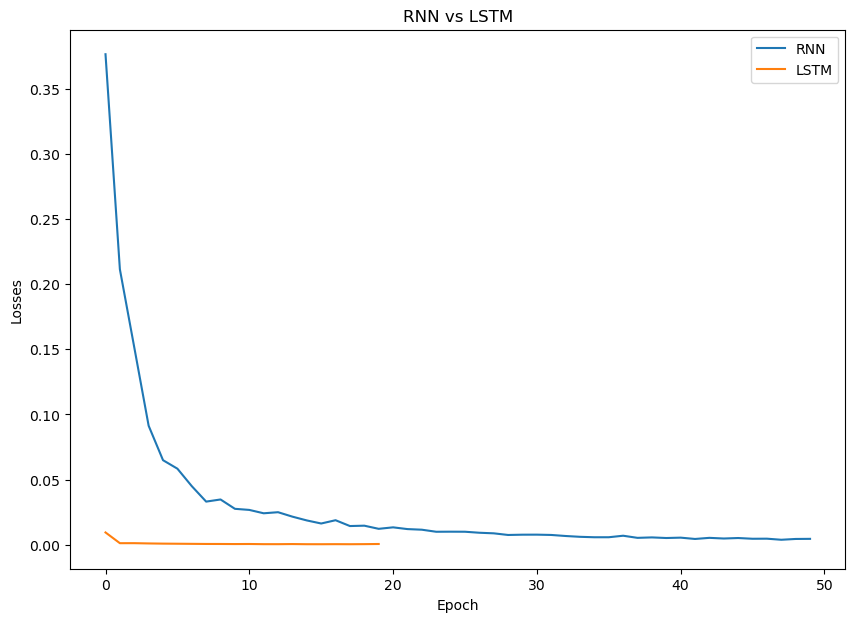

In [45]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"],label = "RNN")
plt.plot(history_lstm.history["loss"],label = "LSTM")

plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("RNN vs LSTM")
plt.legend()
plt.show()

In [61]:
y_pred_of_test = model_lstm.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
y_pred = model_lstm.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) 

36/36 [==============================] - 1s 31ms/step


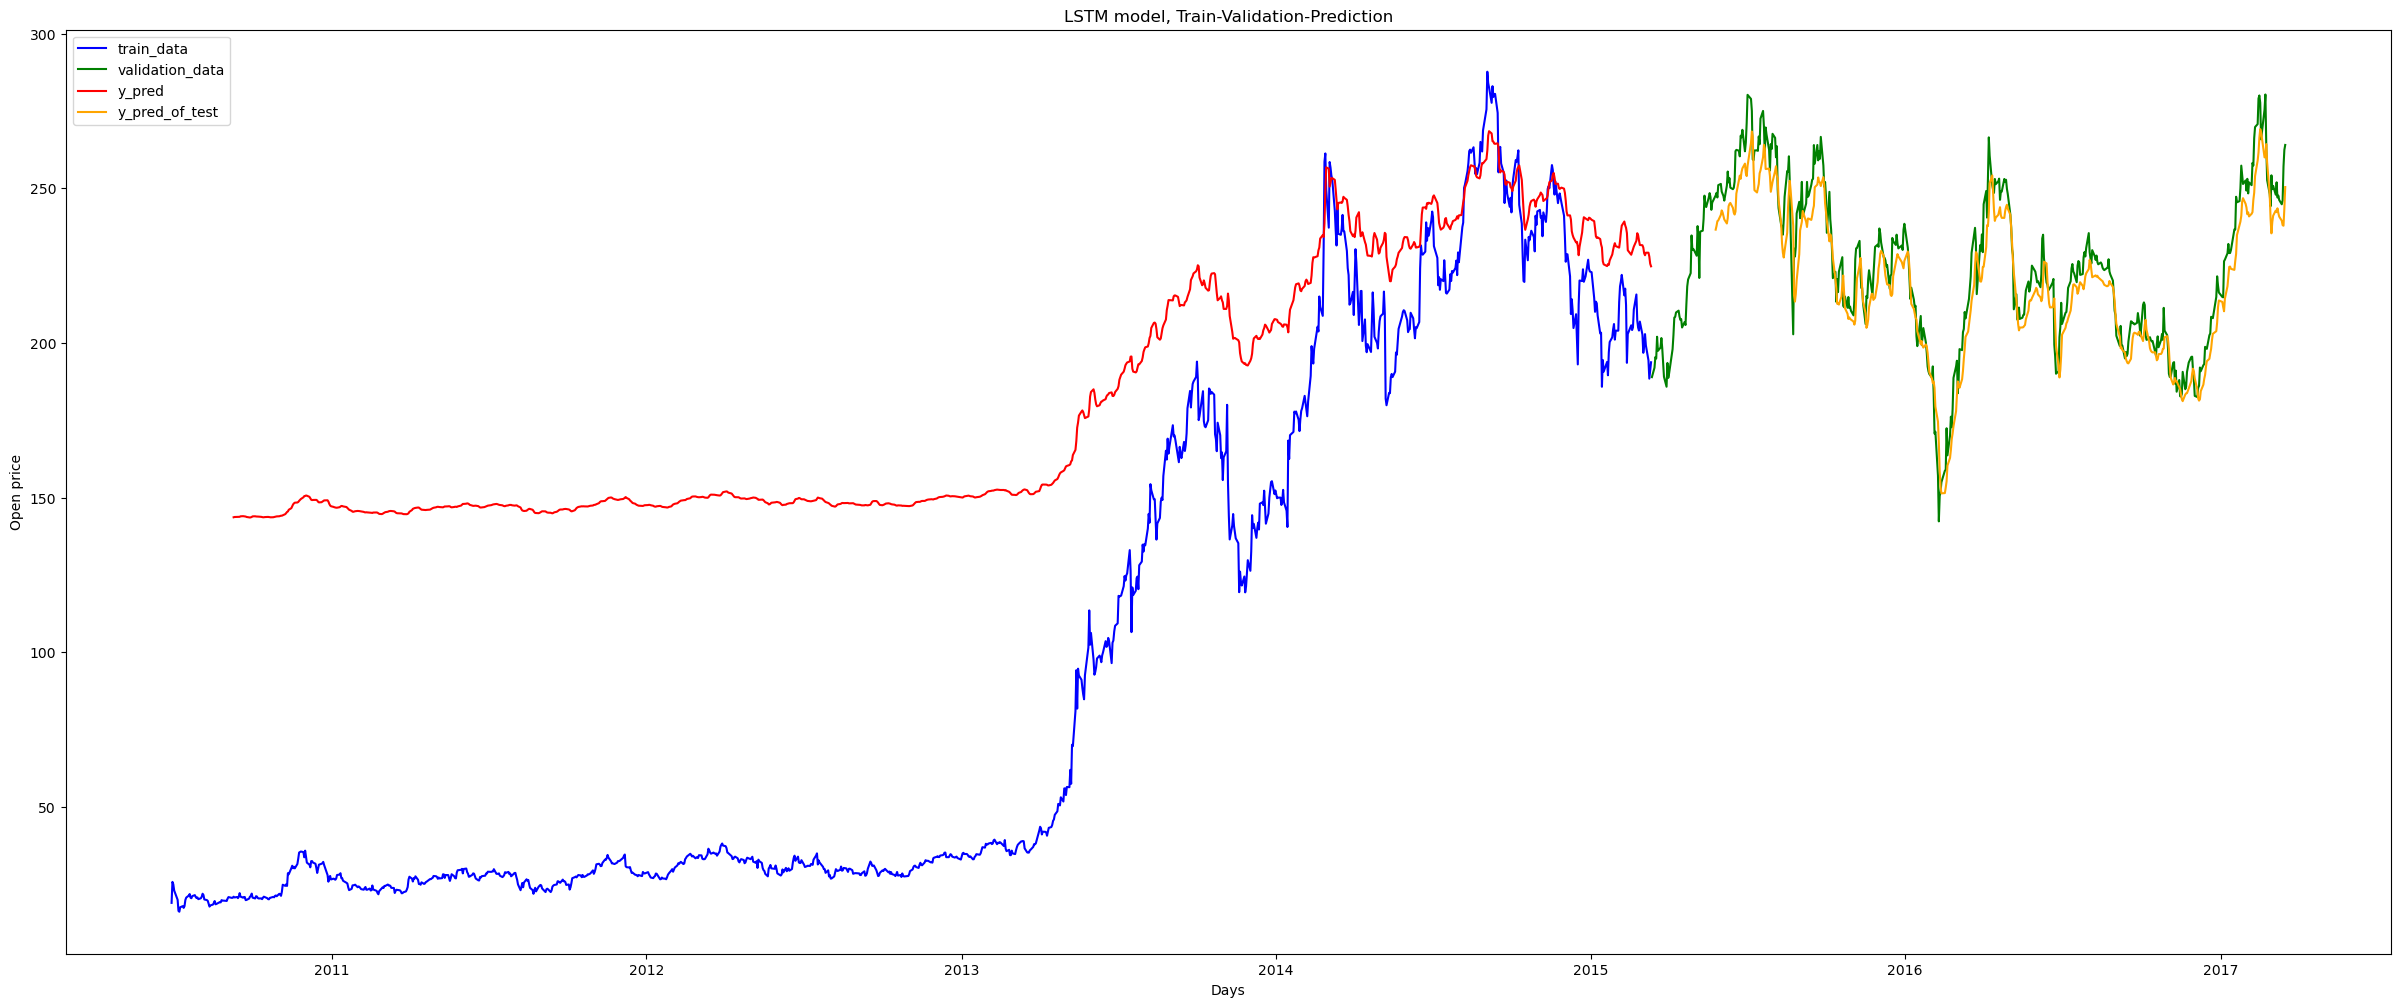

In [62]:
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Train-Validation-Prediction")
plt.legend()
plt.show()

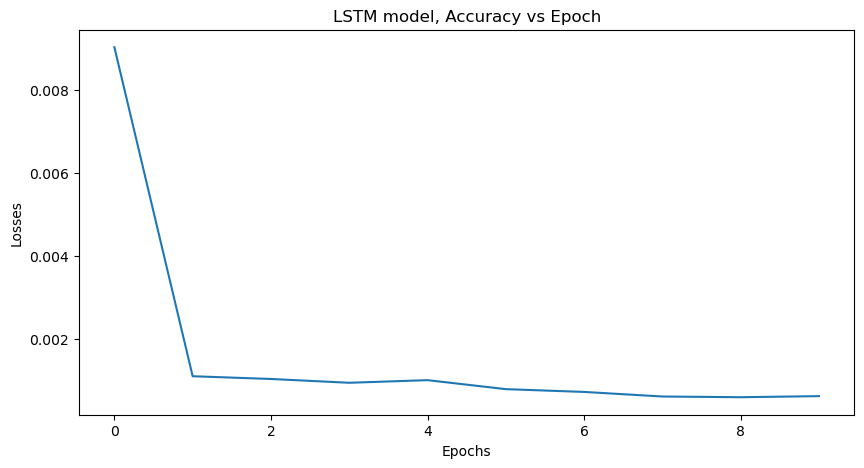

In [34]:
plt.figure(figsize =(10,5))
plt.plot(history_lstm.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

15/15 [==============================] - 2s 32ms/step


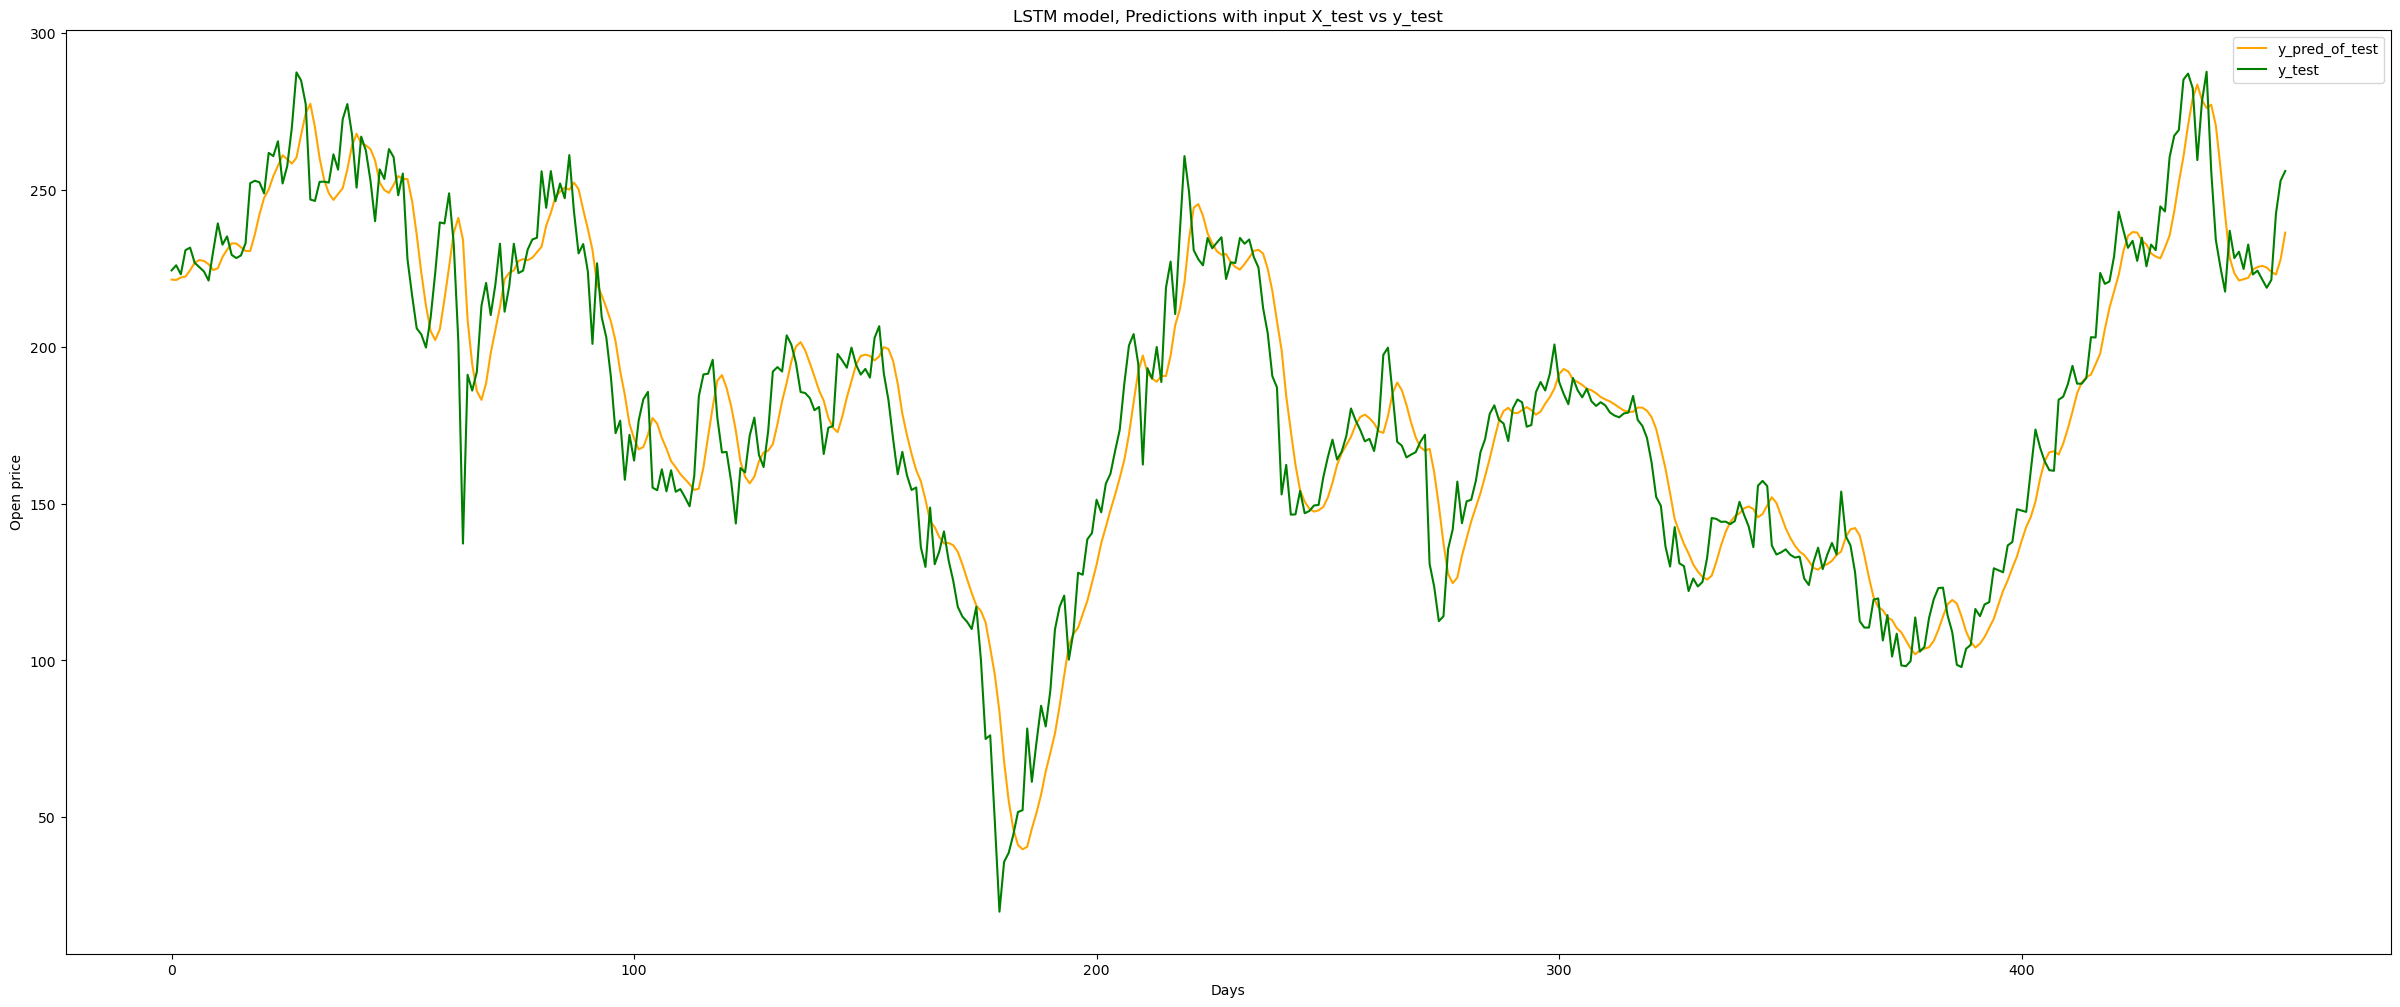

In [35]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [36]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.        ],
        [0.00946363],
        [0.04731867],
        [0.10354429],
        [0.04917441],
        [0.04898868],
        [0.06643166],
        [0.19075893],
        [0.18983106],
        [0.38652815],
        [0.35331247],
        [0.36054942],
        [0.43755803],
        [0.57320468],
        [0.5171645 ],
        [0.46316584],
        [0.48450549],
        [0.42345532],
        [0.49415485],
        [0.40675446],
        [0.47300067],
        [0.45611434],
        [0.58953431],
        [0.57394708],
        [0.7390982 ],
        [0.80478773],
        [0.82241588],
        [0.97624793],
        [0.99424758],
        [0.94971253],
        [0.73074763],
        [0.90981655],
        [1.        ],
        [0.69734648],
        [0.48691791],
        [0.40359993],
        [0.32974585],
        [0.51512331],
        [0.43217682],
        [0.45128979],
        [0.39877539],
        [0.47318612],
        [0.38188907],
        [0.39357964],
        [0.36722971],
        [0

In [37]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 66ms/step
Simple RNN, Open price prediction for 3/18/2017      : 255.16756
LSTM prediction, Open price prediction for 3/18/2017 : 256.97287


In [42]:
train_p=regressor.predict(X_train)
#test_p=regressor.predict(y_train)

36/36 [==============================] - 1s 21ms/step


In [44]:
train_p=scaler.inverse_transform(train_p)

In [45]:
import math
from sklearn.metrics import mean_squared_error
#train_mse=maths.sqrt(train_p-X_test)
train_mse=math.sqrt(mean_squared_error(y_train,train_p))
train_mse

242.33135865845728

In [47]:
import math
from sklearn.metrics import mean_squared_error
train_p=model_lstm.predict(X_train)
train_p=scaler.inverse_transform(train_p)
train_mse=math.sqrt(mean_squared_error(y_train,train_p))
train_mse

36/36 [==============================] - 1s 29ms/step


119.18568027980444

In [57]:
import math
from sklearn.metrics import mean_squared_error
test_p=model_lstm.predict(X_test)
test_p=scaler.inverse_transform(test_p)
test_mse=math.sqrt(mean_squared_error(y_test,test_p))
test_mse

15/15 [==============================] - 0s 29ms/step


220.19232097254368

In [58]:
import math
from sklearn.metrics import mean_squared_error
test_p=regressor.predict(X_test)
test_p=scaler.inverse_transform(test_p)
test_mse=math.sqrt(mean_squared_error(y_test,test_p))
test_mse

15/15 [==============================] - 1s 21ms/step


228.5404924503889